In [54]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [55]:
metro_parks = gpd.read_file('../data/metro_parks.geojson')
print(metro_parks.crs)
metro_parks.head()

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [56]:
type(metro_parks)

geopandas.geodataframe.GeoDataFrame

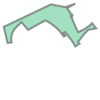

In [57]:
metro_parks.loc[0,'geometry']

In [58]:
metro_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       287 non-null    object  
 1   name        183 non-null    object  
 2   year_estab  287 non-null    object  
 3   common_nam  287 non-null    object  
 4   status      287 non-null    object  
 5   address     283 non-null    object  
 6   lon         287 non-null    object  
 7   lat         287 non-null    object  
 8   descriptio  103 non-null    object  
 9   geometry    287 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 22.5+ KB


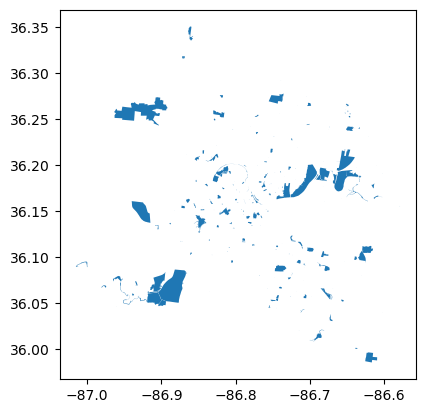

In [59]:
metro_parks.plot();

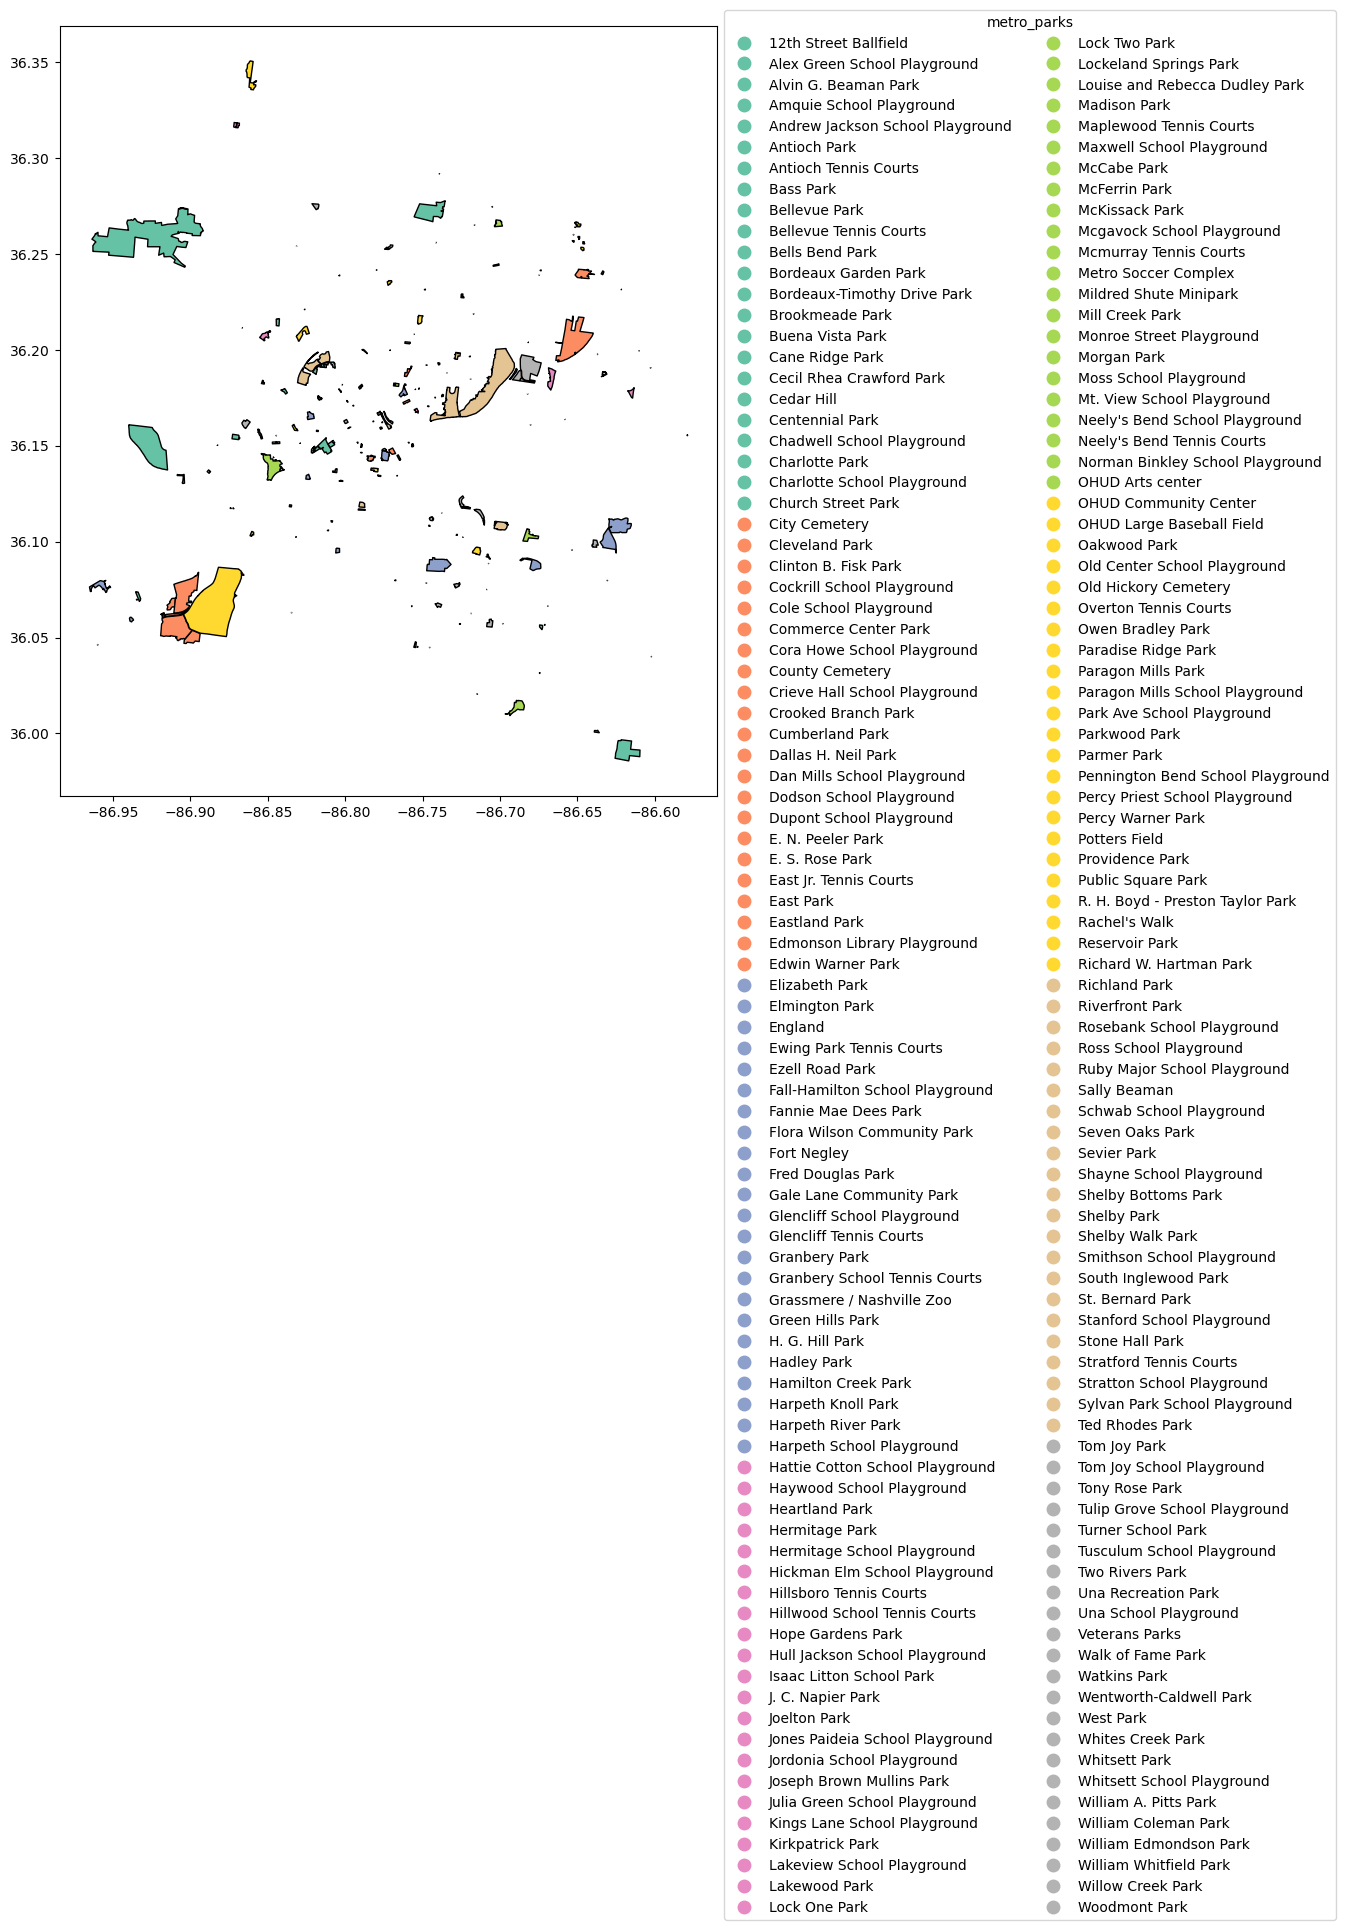

In [60]:
leg_kwds = {'title': 'metro_parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

metro_parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [61]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [62]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             56 non-null     object  
 1   objectid        56 non-null     object  
 2   po_name         56 non-null     object  
 3   shape_stlength  56 non-null     object  
 4   shape_starea    56 non-null     object  
 5   geometry        56 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


In [63]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
parks_geo = gpd.GeoDataFrame(metro_parks, 
                             crs=zipcodes.crs,
                             geometry = metro_parks['geometry'])

In [65]:
type(parks_geo)

geopandas.geodataframe.GeoDataFrame

In [66]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [67]:
parks_by_zip = gpd.sjoin(parks_geo, zipcodes, op = 'within')

C:\Users\hanna\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [68]:
parks_by_zip.head()

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,po_name
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...",7,37221,NASHVILLE
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...",7,37221,NASHVILLE
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...",7,37221,NASHVILLE
127,0.51,Bellevue Tennis Courts,0,Bellevue Tennis Courts,TENNIS,Colice Jeane Rd @ Baugh Rd,0,0,None,"MULTIPOLYGON (((-86.93431 36.07001, -86.93416 ...",7,37221,NASHVILLE
154,0.1,Harpeth School Playground,2002,Harpeth School Playground,PLAYGROUND,Learning Ln @ Collins Rd,0,0,None,"MULTIPOLYGON (((-86.95997 36.04626, -86.95980 ...",7,37221,NASHVILLE


In [69]:
parks_by_zip['zip'].value_counts()

37221    21
37214    19
37208    18
37228    17
37013    16
37211    16
37209    15
37201    13
37206    13
37203    12
37218    12
37138    11
37207    10
37076     9
37205     8
37115     7
37217     6
37210     6
37215     5
37216     4
37204     3
37212     3
37189     3
37220     2
37027     2
37080     2
37219     2
37213     1
37072     1
Name: zip, dtype: int64

In [70]:
parks_in_37221 = parks_by_zip.loc[parks_by_zip['zip'] == '37221']
parks_in_37221.shape

(21, 13)

In [71]:
parks_in_37221

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,po_name
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...",7,37221,NASHVILLE
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...",7,37221,NASHVILLE
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...",7,37221,NASHVILLE
127,0.51,Bellevue Tennis Courts,0,Bellevue Tennis Courts,TENNIS,Colice Jeane Rd @ Baugh Rd,0,0,None,"MULTIPOLYGON (((-86.93431 36.07001, -86.93416 ...",7,37221,NASHVILLE
154,0.1,Harpeth School Playground,2002,Harpeth School Playground,PLAYGROUND,Learning Ln @ Collins Rd,0,0,None,"MULTIPOLYGON (((-86.95997 36.04626, -86.95980 ...",7,37221,NASHVILLE
234,4.76822433631,None,1995,Harpeth River Greenway - Warner - Morton Mill,GW,Morton Mill Rd,0,0,None,"MULTIPOLYGON (((-86.95525 36.06641, -86.95474 ...",7,37221,NASHVILLE
236,33.2810709256,None,2013,Harpeth River Greenway - Warner - Harpeth Bend,GW,Mcpherson Dr,0,0,None,"MULTIPOLYGON (((-86.92983 36.05781, -86.93077 ...",7,37221,NASHVILLE
237,3.19200896289,None,2013,Harpeth River Greenway - Warner - Harpeth Valley,GW,7629 Old Harding Pk,0,0,None,"MULTIPOLYGON (((-86.94842 36.05432, -86.94837 ...",7,37221,NASHVILLE
238,9.41952711306,None,1995,Harpeth River Greenway - Warner - Morton Mill,GW,7600 OLD HARDING PIKE,0,0,None,"MULTIPOLYGON (((-86.94465 36.05937, -86.94490 ...",7,37221,NASHVILLE
239,9.01216173347,None,2013,Harpeth River Greenway - Warner - Harpeth Crest,GW,1080 Morton Mill Rd,0,0,None,"MULTIPOLYGON (((-86.95501 36.06847, -86.95523 ...",7,37221,NASHVILLE


In [72]:
polygon37221 = zipcodes.loc[zipcodes['zip'] == '37221']
polygon37221.shape

(1, 3)

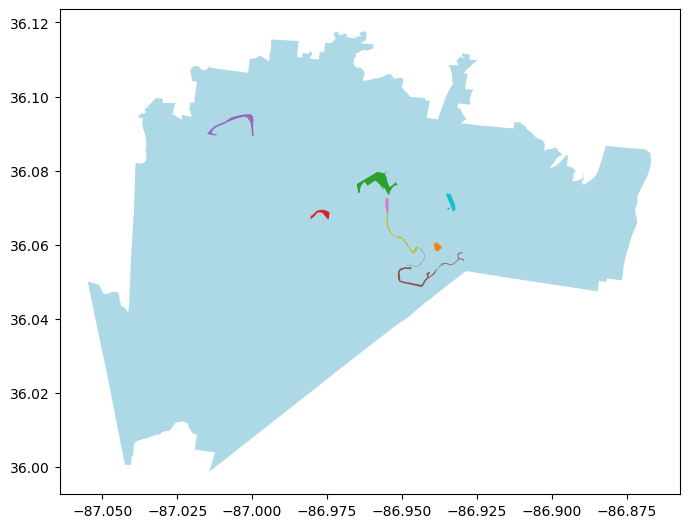

In [73]:
ax = polygon37221.plot(figsize = (8, 10), color = 'lightblue')
parks_in_37221.plot( ax = ax, column = 'common_nam');
plt.show();

In [74]:
center = polygon37221.geometry.centroid

C:\Users\hanna\AppData\Local\Temp\ipykernel_16696\325392811.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37221.geometry.centroid


In [75]:
print(center)

7    POINT (-86.97531 36.06283)
dtype: geometry


#### Folium requires a location point as an array <br>
with latitude first <br>
but shapely Points have longitude first

In [76]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[7    36.062832
dtype: float64, 7   -86.975314
dtype: float64]


In [77]:
map_37221 = folium.Map(location =  area_center, zoom_start = 12)
map_37221

In [78]:
folium.GeoJson(polygon37221).add_to(map_37221)

In [81]:
for row_index, row_values in parks_in_37221.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="blue",icon="fa-solid fa-tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37221)
map_37221.save('../maps/map37221.html')

map_37221

In [90]:
polygon_all_zips = zipcodes
polygon_all_zips.shape

(56, 3)

In [91]:
polygon_all_zips

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,JOELTON,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,NASHVILLE,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,37072,GOODLETTSVILLE,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,37212,NASHVILLE,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


In [102]:
# center1 = polygon_all_zips.geometry.centroid

# area_center1 = [center1.y, center1.x]
# print(area_center1)

area_center2 =[36.174465, -86.767960]

In [103]:
map_all_zips = folium.Map(location =  area_center2, zoom_start = 12)
map_all_zips

In [104]:
folium.GeoJson(polygon_all_zips).add_to(map_all_zips)

In [105]:
for row_index, row_values in parks_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="blue",icon="fa-solid fa-tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_all_zips)
map_all_zips.save('../maps/mapallzips.html')

map_all_zips